In [1]:
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
import copy

In [2]:
# x est la varibale représentant les données
#K est la taille de x    
#N est un chiffre relativement grand jouant le role de +inf 
#Cette fonction permet d'initialiser les partitions de Voronoi
def bound(N,x,K):
    l_bound= np.zeros(K+1)
    l_bound[0]=-N
    l_bound[-1]=N
    for i in range(K-1):
        l_bound[i+1]=(x[i]+x[i+1])/2.
    return(l_bound)


In [3]:
def lloyd_num(a,b): #Cette fonction retourne le numerateur de l'iteration de notre algorithme de Lloyd version init
    j= math.e**(-a**2/2)
    k= math.e**(-b**2/2)
    return((-1/np.sqrt(2*math.pi)*(k-j)))

In [4]:
def lloyd_den(a,b): #Celle ci retourne le denominateur de l'iteration de l'algorithme de Lloyd version init
    return(norm.cdf(b)-norm.cdf(a))

In [5]:
def lloyd_it(N,x,m,sigma,K): #algorithme de lloyd version initiale
    x_it=copy.deepcopy(x)
    l_bound=bound(N,x,K)
    for i in range(K):
        if (lloyd_den(l_bound[i],l_bound[i+1])!=0): #So we don't divide by 0!
            x_it[i]=lloyd_num(l_bound[i],l_bound[i+1])/lloyd_den(l_bound[i],l_bound[i+1])
    return(x_it)

In [6]:
def weight(N,x,m,sigma,K): #Ce sont les poids de la mesure uniforme associée aux données
    u=np.zeros(K)
    l_bound=bound(N,x,K)
    for i in range(K):
        u[i]=lloyd_den(l_bound[i],l_bound[i+1])
    return(u)   

In [7]:
def error_normal_0_1(x,a,b):  # Détails du calcul dans le 1er point dans la section "Deux exemples de l'algorithme de LLyod"
    return((1+x**2)*(norm.cdf(b,0,1)-norm.cdf(a,0,1)) + ( ((2*x)/math.sqrt(2*math.pi))*(math.e**(-(b**2/2))-math.e**(-(a**2/2))) ) + ( (1/math.sqrt(2*math.pi))*((math.e**(-(a**2/2))*a)-(math.e**(-(b**2/2))*b)) ) )

In [8]:
def distortion_N_0_1(N,x,K): #Code de la fonction de distortion 
    cpt=0
    tmp=0
    l_bound=bound(N,x,K)
    for i in range(0,K-1):
        tmp= error_normal_0_1(x[i], l_bound[i], l_bound[i+1])
        cpt+= tmp
        #print(cpt)
    return(cpt)

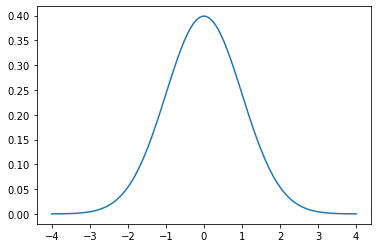

In [9]:
supp= np.linspace(-4,4,100)    
real_density=np.zeros(100)
for i in range(100):
    real_density[i]=norm.pdf(supp[i], 0 , 1)
plt.plot(supp,real_density)

In [21]:
#Cas Pratique
K=7 #taille de grille
L=100 #nombres d'itérations de Lloyd
N=200 #loi normale tronquée à l'intervalle [-200,200]
m=0. #moyenne de l'échantillon
sigma=1.
np.random.seed(1)
opt_grid=np.sort(np.random.normal(m,sigma,K)) #echantillon
l_error_accurate=np.zeros(L)
for i in range(L):
    opt_grid= lloyd_it(N, opt_grid, m, sigma, K)
    l_error_accurate[i]= math.sqrt(distortion_N_0_1(N,opt_grid,K))
w= weight(N,opt_grid,m,sigma,K)
print(w)

[0.05357642 0.13726856 0.1986092  0.22074377 0.19872581 0.13742017
 0.05365606]


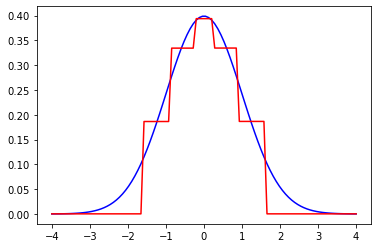

In [22]:
x_simulation= np.linspace(-4,4,100)  
simu_density=np.zeros(100)
opt_x_bound=bound(N,opt_grid,K)
for i in range(100):
    for j in range(K):
        if (x_simulation[i]>= opt_x_bound[j] and x_simulation[i]< opt_x_bound[j+1] ):
            simu_density[i]= w[j]/(opt_x_bound[j+1]-opt_x_bound[j])

plt.plot(supp,real_density,"b",x_simulation,simu_density,"r")

Text(0, 0.5, 'log-Erreur')

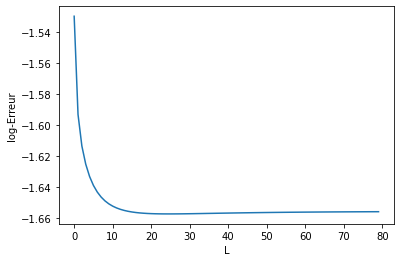

In [25]:
plt.plot(np.log(l_error_accurate)[0:80])
#plt.title("Log-erreur de quantification") 
plt.xlabel("L")
plt.ylabel("log-Erreur")

Text(0, 0.5, 'Erreur')

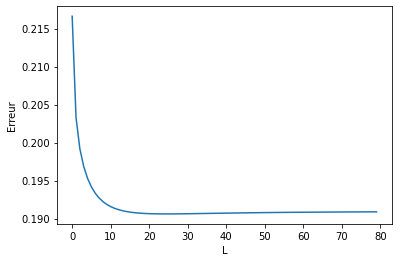

In [26]:
plt.plot(l_error_accurate[:80])
#plt.title("erreur de quantification") 
plt.xlabel("L")
plt.ylabel("Erreur")